This code gives a visual representation of the Bernstein design matrix. We can see that every row turns into a delta function for a high degree. The details are in the calculation.

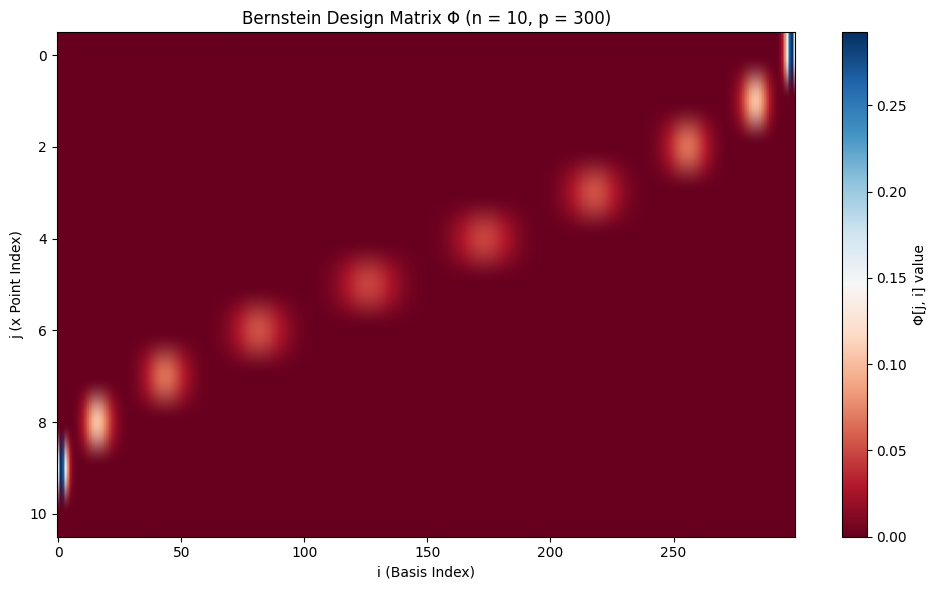

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import comb
from numpy.polynomial.legendre import leggauss

# Define the Bernstein basis function
def bernstein_basis(j, n, x):
    return comb(n, j) * (x ** j) * ((1 - x) ** (n - j))

# Generate the design matrix Φ
def generate_phi_matrix(n, p):
    #Uniform
    #x_points = np.linspace(0, 1, n + 1)
    #Random
    #x_points = np.random.rand(n + 1)
    #Legendre
    #x_legendre, _ = leggauss(n)  # Nodes and weights on [-1, 1]
    # If needed on [0, 1]:
    #x_points = 0.5 * (x_legendre + 1)
    #Chebyshev
    k = np.arange(1, n+1)
    x_chebyshev = np.cos((2*k - 1) * np.pi / (2*n))  # On [-1, 1]
    # Map to [0, 1] if needed:
    x_points = 0.5 * (x_chebyshev + 1)
    phi = np.zeros((n + 1, p))
    for j, x in enumerate(x_points):
        for i in range(p):
            phi[j, i] = bernstein_basis(i, p - 1, x)
    return phi

# Plot the Bernstein design matrix Φ
def plot_phi(n, p):
    phi = generate_phi_matrix(n, p)
    plt.figure(figsize=(10, 6))
    plt.imshow(phi, cmap='RdBu', aspect='auto')
    plt.title(f"Bernstein Design Matrix Φ (n = {n}, p = {p})")
    plt.xlabel("i (Basis Index)")
    plt.ylabel("j (x Point Index)")
    plt.colorbar(label="Φ[j, i] value")
    plt.tight_layout()
    plt.savefig("bernsteindm_chebyshev.pdf")
    plt.show()

'''
# Compute and plot the pseudoinverse of Φ
def plot_pseudoinverse(n, p):
    phi = generate_phi_matrix(n, p)
    phi_pinv = np.linalg.pinv(phi)  # Moore-Penrose pseudoinverse

    plt.figure(figsize=(10, 6))
    plt.imshow(phi_pinv, cmap='coolwarm', aspect='auto')
    plt.title(f"Pseudoinverse of Φ (Φ⁺) (n = {n}, p = {p})")
    plt.xlabel("j (x Point Index)")    # Columns correspond to x-points
    plt.ylabel("i (Basis Index)")      # Rows correspond to basis functions
    plt.colorbar(label="Φ⁺[i, j] value")
    plt.tight_layout()
    plt.show()
'''
# ---- Change these values ----
n = 10  # Number of data points (n+1 total points)
p = 300  # Number of basis functions

# ---- Run the visualizations ----
plot_phi(n, p)
#plot_pseudoinverse(n, p)

